In [2]:
import pandas as pd

In [3]:
#Reading csv into a dataframe
df = pd.read_csv("sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
#Checking for implicit null values
df.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [5]:
shortened_df = df[["sentiment", "text"]]
shortened_df.shape[0]

13871

In [6]:
shortened_df = shortened_df.dropna()
shortened_df.shape[0]

13871

In [7]:
#Changes sentiments to numerical labels
shortened_df["label"] = 0
for ind in shortened_df.index:
    if (shortened_df["sentiment"][ind] == "Neutral"):
        shortened_df["label"][ind] = 0
    elif (shortened_df["sentiment"][ind] == "Positive"):
        shortened_df["label"][ind] = 1
    else:
        shortened_df["label"][ind] = 2

/var/folders/kn/d6m3n8r52vd4544z7x_6p0dm0000gp/T/ipykernel_5508/2748283948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_df["label"][ind] = 0
/var/folders/kn/d6m3n8r52vd4544z7x_6p0dm0000gp/T/ipykernel_5508/2748283948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_df["label"][ind] = 1
/var/folders/kn/d6m3n8r52vd4544z7x_6p0dm0000gp/T/ipykernel_5508/2748283948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [8]:
shortened_df.head()

,sentiment,text,label
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...,0
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


<AxesSubplot:xlabel='label', ylabel='count'>

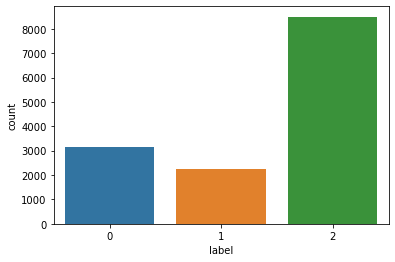

In [9]:
import seaborn as sns
sns.countplot(data = shortened_df, x = "label") #Checks if the labels are balanced

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(shortened_df, test_size = 0.2, random_state = 101) #Breaking our dataset into training and testing datasets

In [11]:
df_train.shape[0]

11096

In [12]:
df_test.shape[0]

2775

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shriyadave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
english_stopwords = stopwords.words('english')

stemmer = SnowballStemmer('english')

regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [15]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [16]:
df["text"] = df["text"].apply(lambda text : preprocess(text))

In [17]:
df.text

0        rt nancyleegrahn everyon feel climat chang que...
1        rt scottwalk catch full gopdeb last night scot...
2        rt tjmshow mention tamir rice gopdeb held clev...
3        rt robgeorg car fiorina trend hour debat men c...
4        rt danscavino gopdeb w realdonaldtrump deliv h...
                               ...                        
13866    rt cappi yarbrough love see men never face pre...
13867    rt georgehenryw thought huckabe exceed expect ...
13868    rt lrihendri tedcruz presid alway tell truth s...
13869    rt jrehl gopdeb donald trump say time polit co...
13870    rt lrihendri tedcruz head presidenti debat go ...
Name: text, Length: 13871, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 101)